> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

 A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
* whether or not patients show up for their appointment ?

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties


In [5]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.shape  # how many rows and columns 

(110527, 14)

* it's contain 110527 rows and 14 columns 

In [8]:
df.info() #show data types and looks if there missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* there is no missing data in the dataset

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* the mean of ages is equal 37 years 
* the minimum age is -1 (wrong value in dataset )



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [10]:
# these columns not important in analysis 
#patient ID , Appointment ID , ScheduleDay and AppointmentDay 
# so drop it 

df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis = 1 , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.shape

(110527, 10)

* after drop , now dataset is contain 10 columns only

In [13]:
# change name of No-show to be like SMS_received 
df.rename (columns = {'No-show':'No_show'} ,inplace = True)
# correct spilling of Hipertension , the correct spelling is Hypertension
df.rename (columns = {'Hipertension':'Hypertension'} , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df[df['Age'] < 0 ]  # this record must be deleted 

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
df = df[df['Age'] >= 0 ]  # now drop this record
df.shape

(110526, 10)

In [23]:
# Assesing 
noshow = df.No_show == "Yes"
show = df.No_show == "No"

In [24]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

In [25]:
df[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

* show = 4 * noshow (4 times)

<a id='eda'></a>
## Exploratory Data Analysis

* this general vision on our dataset 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hypertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

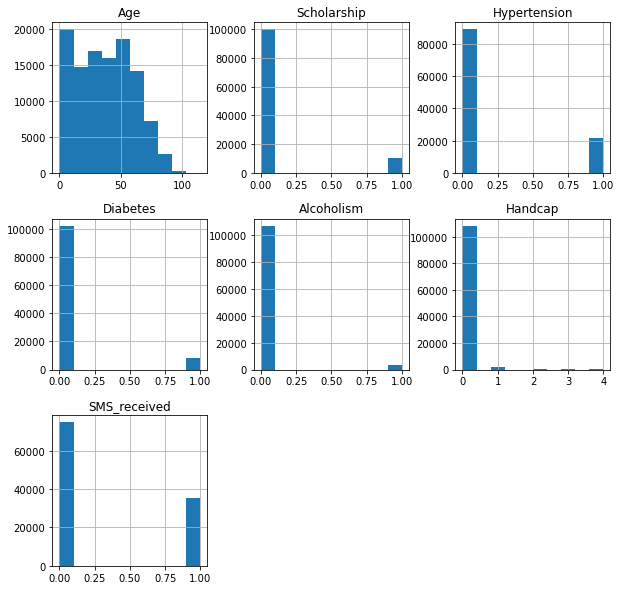

In [70]:
df.hist(figsize=(10,10))

<h1>Notes</h1>

* most age is between 25 and 75
* 10000 patients only are enrolled in Brasilian welfare program Bolsa Família.
* most patients don't have chronic disease 
* patients who have SMS messages is half the people don't have SMS messages

<AxesSubplot:title={'center':'Number of Female/Male'}, xlabel='Female/Male', ylabel='Number of patients'>

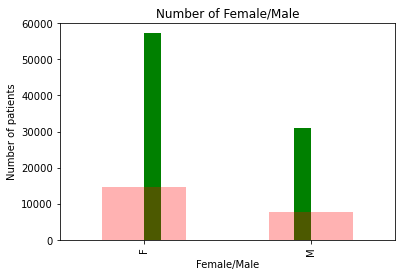

In [42]:
# compare between who show and no show according to gender (M or F)

plt.title("Number of Female / Male")
plt.xlabel("Female / Male")
plt.ylabel("Number of patients");
df.Gender[show].hist(alpha = 1 , color = 'green' )
df.Gender[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [40]:
sh = df.Gender[show].value_counts()
no_sh = df.Gender[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

F    57245
M    30962
Name: Gender, dtype: int64 

 F    14594
M     7725
Name: Gender, dtype: int64


* number of female is reach to double number of male in who show and no show 

<AxesSubplot:title={'center':'compare between who show and no show according to enrollment in the barasilian welfare program'}, xlabel='Walfare', ylabel='Number of patient'>

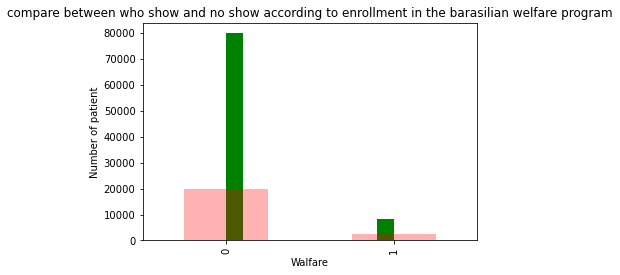

In [45]:
# compare between who show and no show according to enrollment in the barasilian welfare program

plt.title ('compare between who show and no show according to enrollment in the barasilian welfare program')
plt.xlabel ('Walfare')
plt.ylabel ('Number of patient')
df.Scholarship[show].hist(alpha = 1 , color = 'green' )
df.Scholarship[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [46]:
sh =df.Scholarship[show].value_counts()
no_sh = df.Scholarship[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

0    79924
1     8283
Name: Scholarship, dtype: int64 

 0    19741
1     2578
Name: Scholarship, dtype: int64


* Number of who not enrollement is much higher than who enrollement 

<AxesSubplot:title={'center':'compare between who show and no show according to enrollment in the barasilian welfare program'}, xlabel='Age', ylabel='Number of patient'>

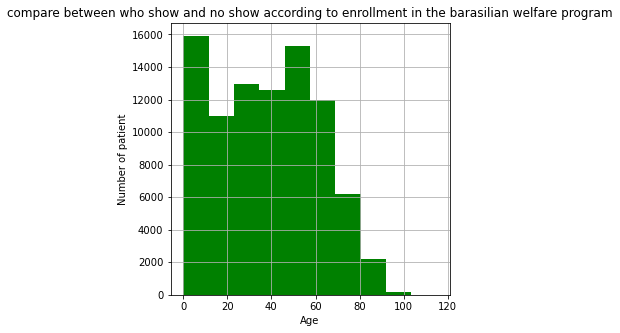

In [64]:
plt.figure(figsize = [5,5]) 
plt.title ('compare between who show and no show according to Age')
plt.xlabel ('Age')
plt.ylabel ('Number of patient')
df.Age[show].hist(alpha = 1 , color = 'green' )

<AxesSubplot:title={'center':'compare between who show and no show according to Age'}, xlabel='Age', ylabel='Number of patient'>

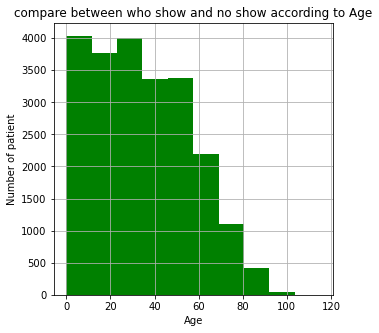

In [65]:
plt.figure(figsize = [5,5])
plt.title ('compare between who show and no show according to Age')
plt.xlabel ('Age')
plt.ylabel ('Number of patient')
df.Age[noshow].hist(alpha = 1 , color = 'green' )

<AxesSubplot:title={'center':'compare between who show and no show according to diabetes'}, xlabel='diabetes', ylabel='Number of patient'>

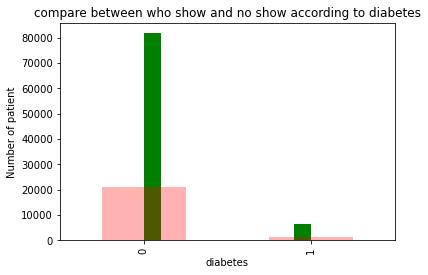

In [67]:
# compare between who show and no show according to chronic diseases (diabetes)
plt.title ('compare between who show and no show according to diabetes')
plt.xlabel ('diabetes')
plt.ylabel ('Number of patient')
df.Diabetes[show].hist(alpha = 1 , color = 'green' )
df.Diabetes[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [71]:
sh =df.Diabetes[show].value_counts()
no_sh = df.Diabetes[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

0    81694
1     6513
Name: Diabetes, dtype: int64 

 0    20889
1     1430
Name: Diabetes, dtype: int64


* most people who showed don't have diabetes 

<AxesSubplot:title={'center':'compare between who show and no show according to diabetes'}, xlabel='Hypertension', ylabel='Number of patient'>

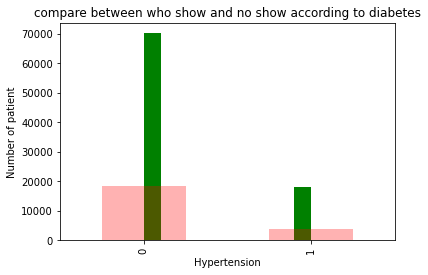

In [72]:
# compare between who show and no show according to chronic diseases (Hypertension)
plt.title ('compare between who show and no show according to diabetes')
plt.xlabel ('Hypertension')
plt.ylabel ('Number of patient')
df.Hypertension[show].hist(alpha = 1 , color = 'green' )
df.Hypertension[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [74]:
sh =df.Hypertension[show].value_counts()
no_sh = df.Hypertension[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

0    70178
1    18029
Name: Hypertension, dtype: int64 

 0    18547
1     3772
Name: Hypertension, dtype: int64


* most people who showed don't have Hypertension

<AxesSubplot:title={'center':'compare between who show and no show according to Alcholism'}, xlabel='Alcholism', ylabel='Number of patient'>

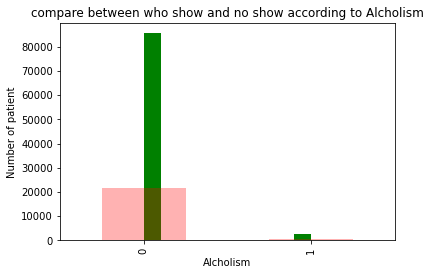

In [80]:
# compare between who show and no show according to Alcholism
plt.title ('compare between who show and no show according to Alcholism')
plt.xlabel ('Alcholism')
plt.ylabel ('Number of patient')
df.Alcoholism[show].hist(alpha = 1 , color = 'green' )
df.Alcoholism[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [76]:
sh = df.Alcoholism[show].value_counts()
no_sh = df.Alcoholism[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

0    85524
1     2683
Name: Alcoholism, dtype: int64 

 0    21642
1      677
Name: Alcoholism, dtype: int64


* most people who showed don't drink cohols

<AxesSubplot:title={'center':'compare between who show and no show according to Alcholism'}, xlabel='Handcap', ylabel='Number of patient'>

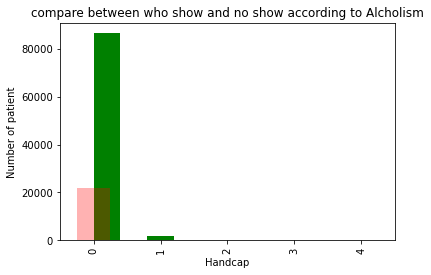

In [81]:
# compare between who show and no show according to being handcap or not
plt.title ('compare between who show and no show according to Alcholism')
plt.xlabel ('Handcap')
plt.ylabel ('Number of patient')
df.Handcap[show].hist(alpha = 1 , color = 'green' )
df.Handcap[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [77]:
sh = df.Handcap[show].value_counts()
no_sh = df.Handcap[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

0    86373
1     1676
2      146
3       10
4        2
Name: Handcap, dtype: int64 

 0    21912
1      366
2       37
3        3
4        1
Name: Handcap, dtype: int64


* most people who showed being handcap

<AxesSubplot:title={'center':'compare between who show and no show according to Recevied SMS or Not'}, xlabel='Recevied SMS or Not', ylabel='Number of patient'>

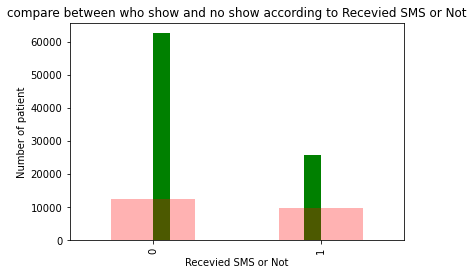

In [83]:
# compare between who show and no show according to Recevied SMS or Not
plt.title ('compare between who show and no show according to Recevied SMS or Not')
plt.xlabel ('Recevied SMS or Not')
plt.ylabel ('Number of patient')
df.SMS_received[show].hist(alpha = 1 , color = 'green' )
df.SMS_received[noshow].value_counts().plot(alpha = 0.3 ,  color = 'red' , kind = 'bar')

In [78]:
sh = df.SMS_received[show].value_counts()
no_sh = df.SMS_received[noshow].value_counts()

print (sh , '\n\n' ,no_sh)

0    62509
1    25698
Name: SMS_received, dtype: int64 

 0    12535
1     9784
Name: SMS_received, dtype: int64


* people showed without receiving an SMS message is double


<AxesSubplot:title={'center':'compare who show or not according to their Neighbourhood'}, xlabel=' Neighbourhood', ylabel='Number of patient'>

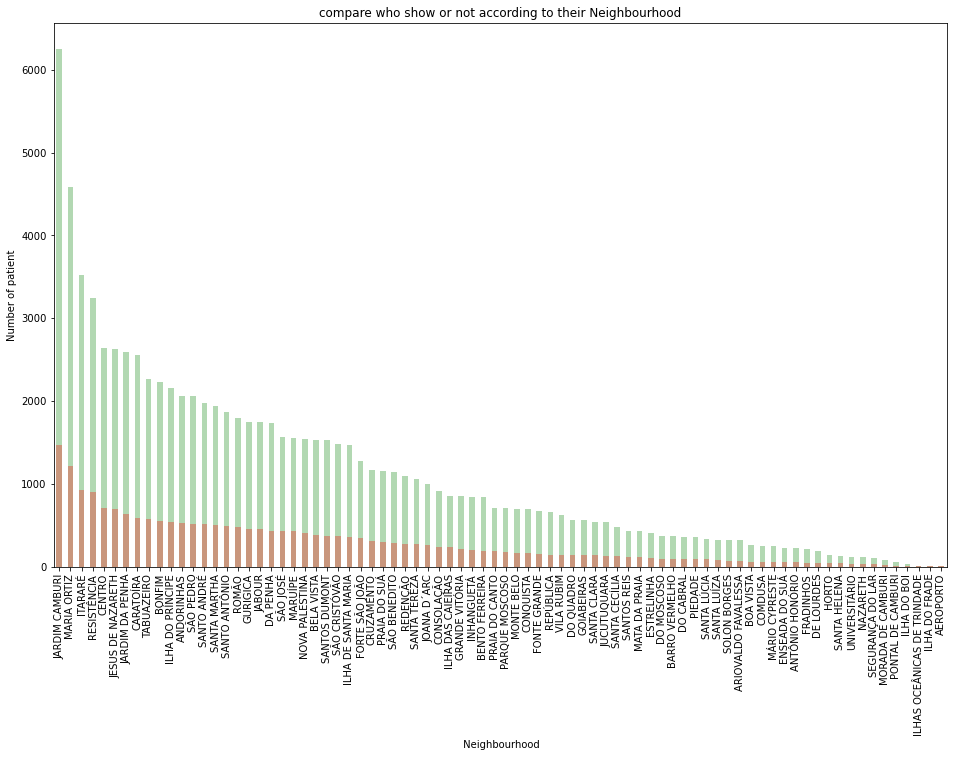

In [85]:
# compare who show or not according to their Neighbourhood
plt.figure(figsize = [16,10])
plt.xlabel (' Neighbourhood')
plt.ylabel ('Number of patient')
plt.title ('compare who show or not according to their Neighbourhood')
df.Neighbourhood[show].value_counts().plot(alpha = 0.3 , label = 'Show' , color = 'green' , kind = 'bar')
df.Neighbourhood[noshow].value_counts().plot(alpha = 0.3 , label = 'Show' , color = 'red' , kind = 'bar')

<a id='conclusions'></a>
## Conclusions

* More people showed without receiving an SMS message !!!
* Finnaly , neighbourhood is strongly related to the patients showing up at the clinic

### Limitations
* couldn't find corrolation between patient showing or non and many columns such as chronic diseases
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_A_dataset.ipynb'])

1